# COVID-19 - NSW Current Infections

---



***Data Source: https://www.health.nsw.gov.au/Infectious/diseases/Pages/covid-19-latest.aspx***

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Load Database

In [8]:
# Load csv archive data from github repo
path='https://raw.githubusercontent.com/dgcarr/COVIDnswStatus/master/NSW_HealthData.csv'
df=pd.read_csv(path, index_col=0)
df['Date'] = pd.to_datetime(df['Date'],dayfirst=True)
#df

from datetime import date

today = date.today()
# dd/mm/YY
currentdate = today.strftime("%d/%m/%Y")
print('Current date is:', currentdate)



Current date is: 02/04/2020


### Scrape NSW Health Website for latest data

In [9]:
dfall = pd.read_html('https://www.health.nsw.gov.au/Infectious/diseases/Pages/covid-19-latest.aspx', flavor='html5lib')
dfall

[                         Cases   Count
 0      Total confirmed cases 1    2298
 1  Cases tested and excluded 2  108239
 2                        Total  110537,                         Status  Cases
 0        Total confirmed cases   2298
 1  ​People tested on 31/3/2020   5314
 2                 Total deaths     10,    Age group  Female  Male  Total
 0        0-9       8     8     16
 1      10-19      37    33     70
 2      20-29     287   215    502
 3      30-39     181   179    360
 4      40-49     123   172    295
 5      50-59     183   177    360
 6      60-69     184   173    357
 7      70-79     118   130    248
 8      80-89      33    37     70
 9     90-100       9    10     19
 10     Total    1163  1134   2297,                                               Source  Cases
 0                                  Overseas acquired   1419
 1  Locally acquired – contact of a confirmed case...    467
 2          Locally acquired – contact not identified    307
 3                  

In [10]:
dforigins = pd.read_html('https://www.health.nsw.gov.au/Infectious/diseases/Pages/covid-19-latest.aspx',match='Source',header=0)
dforigins=dforigins[0]

dforigins['Source'] = dforigins['Source'].str.replace('\d+', '')


if dforigins['Cases'].dtypes =='object':
  print(dforigins['Cases'].dtypes)
  dforigins['Cases'] = dforigins['Cases'].str.replace(u'\u200b', '')
  dforigins['Cases'] = dforigins['Cases'].str.replace(',', '')
  dforigins['Cases'] = dforigins['Cases'].apply(pd.to_numeric)


nc=dforigins.loc[dforigins['Source'] == 'Total','Cases'].values[0]
#nc=nc[0]
print(nc)

ui = dforigins.loc[dforigins['Source'] == 'Under investigation','Cases'].values[0]
print(ui)

un = dforigins.loc[dforigins['Source'] == 'Locally acquired – contact not identified','Cases'].values[0]
print(un)

ui_un=ui+un
#print(ui_un)
dforigins

2298
105
307


,Source,Cases
0,Overseas acquired,1419
1,Locally acquired – contact of a confirmed case...,467
2,Locally acquired – contact not identified,307
3,Under investigation,105
4,Total,2298


In [11]:
dfnew = pd.read_html('https://www.health.nsw.gov.au/Infectious/diseases/Pages/covid-19-latest.aspx',match='Cases',header=0)
dfnew=dfnew[0]

dfnew['Cases'] = dfnew['Cases'].str.replace('\d*', '')

if dforigins['Cases'].dtypes =='object':
  dfnew['Count'] = dfnew['Count'].str.replace(u'\u200b', '')
  dfnew['Count'] = dfnew['Count'].str.replace(',', '')
  dfnew['Count'] = dfnew['Count'].apply(pd.to_numeric)

#tc=dfnew.loc[dfnew['Cases'] == 'Cases tested and excluded','Count'].values
#tc=dfnew.loc[dfnew['Cases'] == 'Cases tested and excluded','Count'].values[0]
tc=dfnew['Count'][1]
print(tc)

dfnew

108239


,Cases,Count
0,Total confirmed cases,2298
1,Cases tested and excluded,108239
2,Total,110537


In [12]:
dfstatus = pd.read_html('https://www.health.nsw.gov.au/Infectious/diseases/Pages/covid-19-latest.aspx',match='Status',header=0)
dfstatus=dfstatus[0]
if dfstatus['Cases'].dtypes =='object':
  dfstatus['Cases'] = dfstatus['Cases'].str.replace(u'\u200b', '')
  dfstatus['Cases'] = dfstatus['Cases'].str.replace(',', '')
  dfstatus['Cases'] = dfstatus['Cases'].apply(pd.to_numeric)
#print(dfstatus)
deaths=dfstatus.loc[dfstatus['Status'] == 'Total deaths','Cases'].values[0]
print(deaths)
dfstatus

10


,Status,Cases
0,Total confirmed cases,2298
1,​People tested on 31/3/2020,5314
2,Total deaths,10


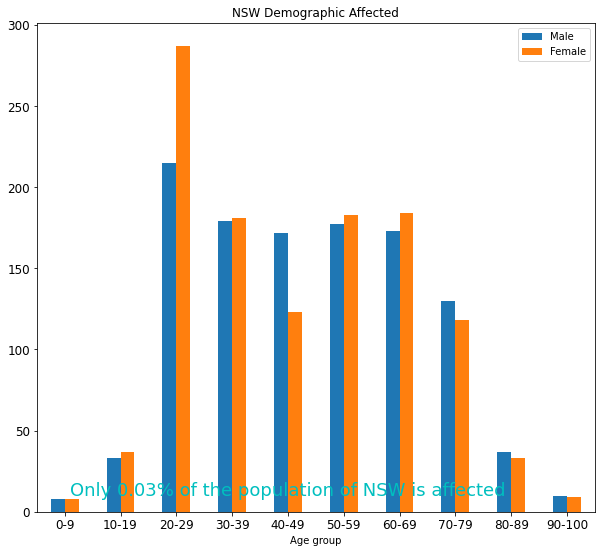

In [13]:
dfage=pd.read_html('https://www.health.nsw.gov.au/Infectious/diseases/Pages/covid-19-latest.aspx',match='Age group',header=0, index_col='Age group')[0]

dfage=dfage[:-1]

ax = dfage.plot.bar(y=['Male','Female'],figsize=(10,9), rot=0,title='NSW Demographic Affected', fontsize=12)

#percentage of NSW population affected
pctNSW=((nc)/7.544e6) * 100
tx=ax.annotate('Only '+str(round(pctNSW,3))+'% of the population of NSW is affected',(0.1,10),family='sans-serif', fontsize=18, color='c')


### Update database

In [14]:
dfnew=pd.DataFrame({'Date':[currentdate] ,
                    'Confirmed Cases':[nc],
                    'Tested and Cleared':[tc],
                    'Unexplained Origin':[ui_un],
                    'Deaths':[deaths]})
dfnew['Date'] = pd.to_datetime(dfnew['Date'],dayfirst=True)
dfapp=df.append(dfnew,ignore_index=True,)

if dfnew['Date'].iloc[-1]>df['Date'].iloc[-1]:
         df=dfapp
df


,Date,Confirmed Cases,Tested and Cleared,Unexplained Origin,Deaths
0,2020-02-26,4,2267,0,5
1,2020-03-07,34,6217,0,5
2,2020-03-08,40,7361,0,5
3,2020-03-09,47,7848,0,5
4,2020-03-10,61,9096,0,5
5,2020-03-11,65,9152,0,5
6,2020-03-12,78,11040,0,5
7,2020-03-13,92,14665,5,5
8,2020-03-14,112,18716,29,5
9,2020-03-15,134,20511,36,5


In [16]:
!git
#df.to_csv(path)

usage: git [--version] [--help] [-C <path>] [-c <name>=<value>]
           [--exec-path[=<path>]] [--html-path] [--man-path] [--info-path]
           [-p | --paginate | --no-pager] [--no-replace-objects] [--bare]
           [--git-dir=<path>] [--work-tree=<path>] [--namespace=<name>]
           <command> [<args>]

These are common Git commands used in various situations:

start a working area (see also: git help tutorial)
   clone      Clone a repository into a new directory
   init       Create an empty Git repository or reinitialize an existing one

work on the current change (see also: git help everyday)
   add        Add file contents to the index
   mv         Move or rename a file, a directory, or a symlink
   reset      Reset current HEAD to the specified state
   rm         Remove files from the working tree and from the index

examine the history and state (see also: git help revisions)
   bisect     Use binary search to find the commit that introduced a bug
   grep       Prin

## NSW Heat Map
<img src="https://www.health.nsw.gov.au/Infectious/diseases/PublishingImages/covid-19-lga-nsw-unknown.png" height="300" />;  <img src="https://www.health.nsw.gov.au/Infectious/diseases/PublishingImages/covid-19-lga-sydney-unknown.png" height="300" />

In [0]:
#from pandas.plotting import register_matplotlib_converters
from mpl_toolkits.axisartist.parasite_axes import HostAxes, ParasiteAxes
#register_matplotlib_converters()

#fig = plt.figure()
fig = plt.figure(figsize=(12,10))

host = HostAxes(fig, [0.15, 0.1, 0.65, 0.8])
#plt.xticks(rotation=70)
par1 = ParasiteAxes(host, sharex=host)
par2 = ParasiteAxes(host, sharex=host)
host.parasites.append(par1)
host.parasites.append(par2)

host.axis["right"].set_visible(False)
par1.axis["right"].set_visible(True)

par1.axis["right"].major_ticklabels.set_visible(True)
par1.axis["right"].label.set_visible(True)

par2.set_ylabel("Confirmed Cases")
offset = (60, 0)
new_axisline = par2.get_grid_helper().new_fixed_axis
par2.axis["right2"] = new_axisline(loc="right", axes=par2, offset=offset)



fig.add_axes(host)

host.set_ylim(0, 0.1)

host.set_xlabel("Date")
host.set_ylabel("Infections/Population Tested [%]")
par1.set_ylabel("Fraction of Suspected Community Acquired Infections [%]")

p1, = host.plot(df['Date'], df['Confirmed Cases']/(df['Tested and Cleared']+df['Confirmed Cases']*100),'-o', label="Infections/Tested Population")
p2, = par1.plot(df['Date'], df['Unexplained Origin']/df['Confirmed Cases']*100,'-o', label="Fraction Suspected Community Acquired Infections")
p3, = par2.plot(df['Date'], df['Confirmed Cases'],'-o',label="Confirmed Cases")

par1.set_ylim(0, 100)
# par2.set_ylim(1, 65)

#host.legend()

host.axis["left"].label.set_color(p1.get_color())
par1.axis["right"].label.set_color(p2.get_color())
par2.axis["right2"].label.set_color(p3.get_color())


fig.autofmt_xdate(bottom=0.5, rotation=30)


plt.title('NSW Health COVID-19 Situation as of ' +str(currentdate),fontsize=18 )

plt.show()



In [0]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
last3 = df['Confirmed Cases'].tail(3).values
Y = np.log10(last3)
X = np.arange(1, 4, dtype=float)
X=X.reshape(-1,1)
#print(X)

lm = linear_model.LinearRegression()
model = lm.fit(X,Y)

y_pred = lm.predict(X)
lm.score(X,Y)

lm.coef_

# # Plot outputs
# plt.scatter(X, Y,  color='black')
# plt.plot(X, y_pred, color='blue', linewidth=3)

# plt.xticks(())
# plt.yticks(())

# plt.show()